# Pre-processing Green's Functions calculated with SPECFEM3D for source-side MTUQ force estimations

-------------------------
 
[MTUQ has the capability of reading Green's Functions](https://uafgeotools.github.io/mtuq/user_guide/03.html) calculated in SPECFEM3D to incorporate 3D velocity models for force estimation.
 
This example aims to guide the pre-processing of the output plain-text files (synthetic seismograms) created by Specfem3D after a simulation. Then, convert them into SAC files with the appropriate name for being read by MTUQ as a Green's Functions database. While we provide the files needed to run SPECFEM3D, this tutorial is not aimed at teaching you how to use that software. For more information on how to run SPECFEM3D, please [look at our virtual workshop](https://sites.google.com/alaska.edu/carltape/home/research/specfem2022?authuser=0).

# Exploring the force input of SPECFEM3D

-------------------------

This example has been built using Green's Functions generated using the FORCESOLUTION file as the source input. You can run the cell below to see an example FORCESOLUTION file:

In [ ]:
!!more FORCESOLUTION_2009

We have also included the DATA directory for SPECFEM3D, should you decide to generate the GFs yourself. This is not required, as we have generated them for you. They were made using PREM as the velocity model, with no topography added to the mesh.

To generate all the Green's Functions required for use in MTUQ, you will have to run SPECFEM3D 3 times (or set it up to run using NUMBER_OF_SIMULTANEOUS_RUNS) for each component direction. We suggest you store them in a single directory with 3 subdirectories: E_force, S_force, and Z_force. This particular script is looking for those subdirectories. Part of the processing steps in this Notebook is to take the resulting seismograms and scale them appropriately - for a factor force source of 1e15 (the default in the above FORCESOLUTION), a carefully defined mesh in SPECFEM3D, and data downloaded in SI units (m, m/s, m/s^2), all that needs to be done is divide the Green's Functions by 1e15 to arrive at a unit impulse. 

An additional complication is that MTUQ uses an Up-South-East coordinate system internally, so to accomodate this you must generate a GF for a South-directed force. This is accomplished by putting -1.d0 in the 'component dir vect source N:' row above.

# Exploring the outputs of SPECFEM3D

-------------------------

The scaling factor is likely to change depending on your [input units for your model in SPECFEM3D](https://github.com/orgs/SPECFEM/discussions/1567#discussioncomment-4262754), since the output units for your seismograms will also change based on that. However, if your model is defined in SI units, your output will also be in SI units. This is important in regards to scaling the Green's Functions. 

Additionally, the output format for the seismograms is ASCII, and MTUQ requires SAC files. The other two parts of preprocessing the Green's Functions are to build the SAC headers from the FORCESOLUTION and STATIONS files, rewrite the ASCII files into SAC files, and finally rotate the Green's Functions from a ZNE coordinate system to the RTZ coordinate system. This differs from any preprocessing done for Green's Functions made in SPECFEM3D_Globe, as the global code is able to write seismograms in SAC format and save RTZ seismograms. It is important, however, to be sure that you have saved displacement seismograms in SPECFEM3D, as this script will *not* integrate or differentiate the seismograms to give you displacement Green's Functions.

You will have to know the event origin time, as that information is not saved anywhere in the FORCESOLUTION or STATIONS files. For the two examples in this Notebook, the event time is given at the bottom of the processing script.

# Preprocessing the Green's Functions

-------------------------

The main script for all the steps discussed above is process_F_GFs.py. We will first explore a force representation of an earthquake; specifically the 2009 Anchorage event that is the default example event. You can run the cell below to use the script:

In [ ]:
%run process_F_GFs.py

You should now have a ready-to-use database of source-side Green's Functions for use in MTUQ! These are stored in the directory PROCESSED_2009, and the original Green's Functions should still be available to you as well, as a backup option. If you choose to rerun the processing script for this example, you will need to delete PROCESSED_2009.

# Using the Green's Functions in MTUQ

-------------------------

We have provided two scripts for use in MTUQ to run the force inversion for 2 separate earthquakes. One is the default 2009 Anchorage event, which the data is already available in the examples directory of MTUQ (once it is [installed appropriately](https://uafgeotools.github.io/mtuq/install/index.html)). The Green's Functions for this event were preprocessed in the cell above, and you will have to modify the variable SF_path in Line 42 in the script to point at the absolute path to PROCESSED_2009. You should now be able to run ForceGridSearch_2009.py, and compare the output to the figure below.

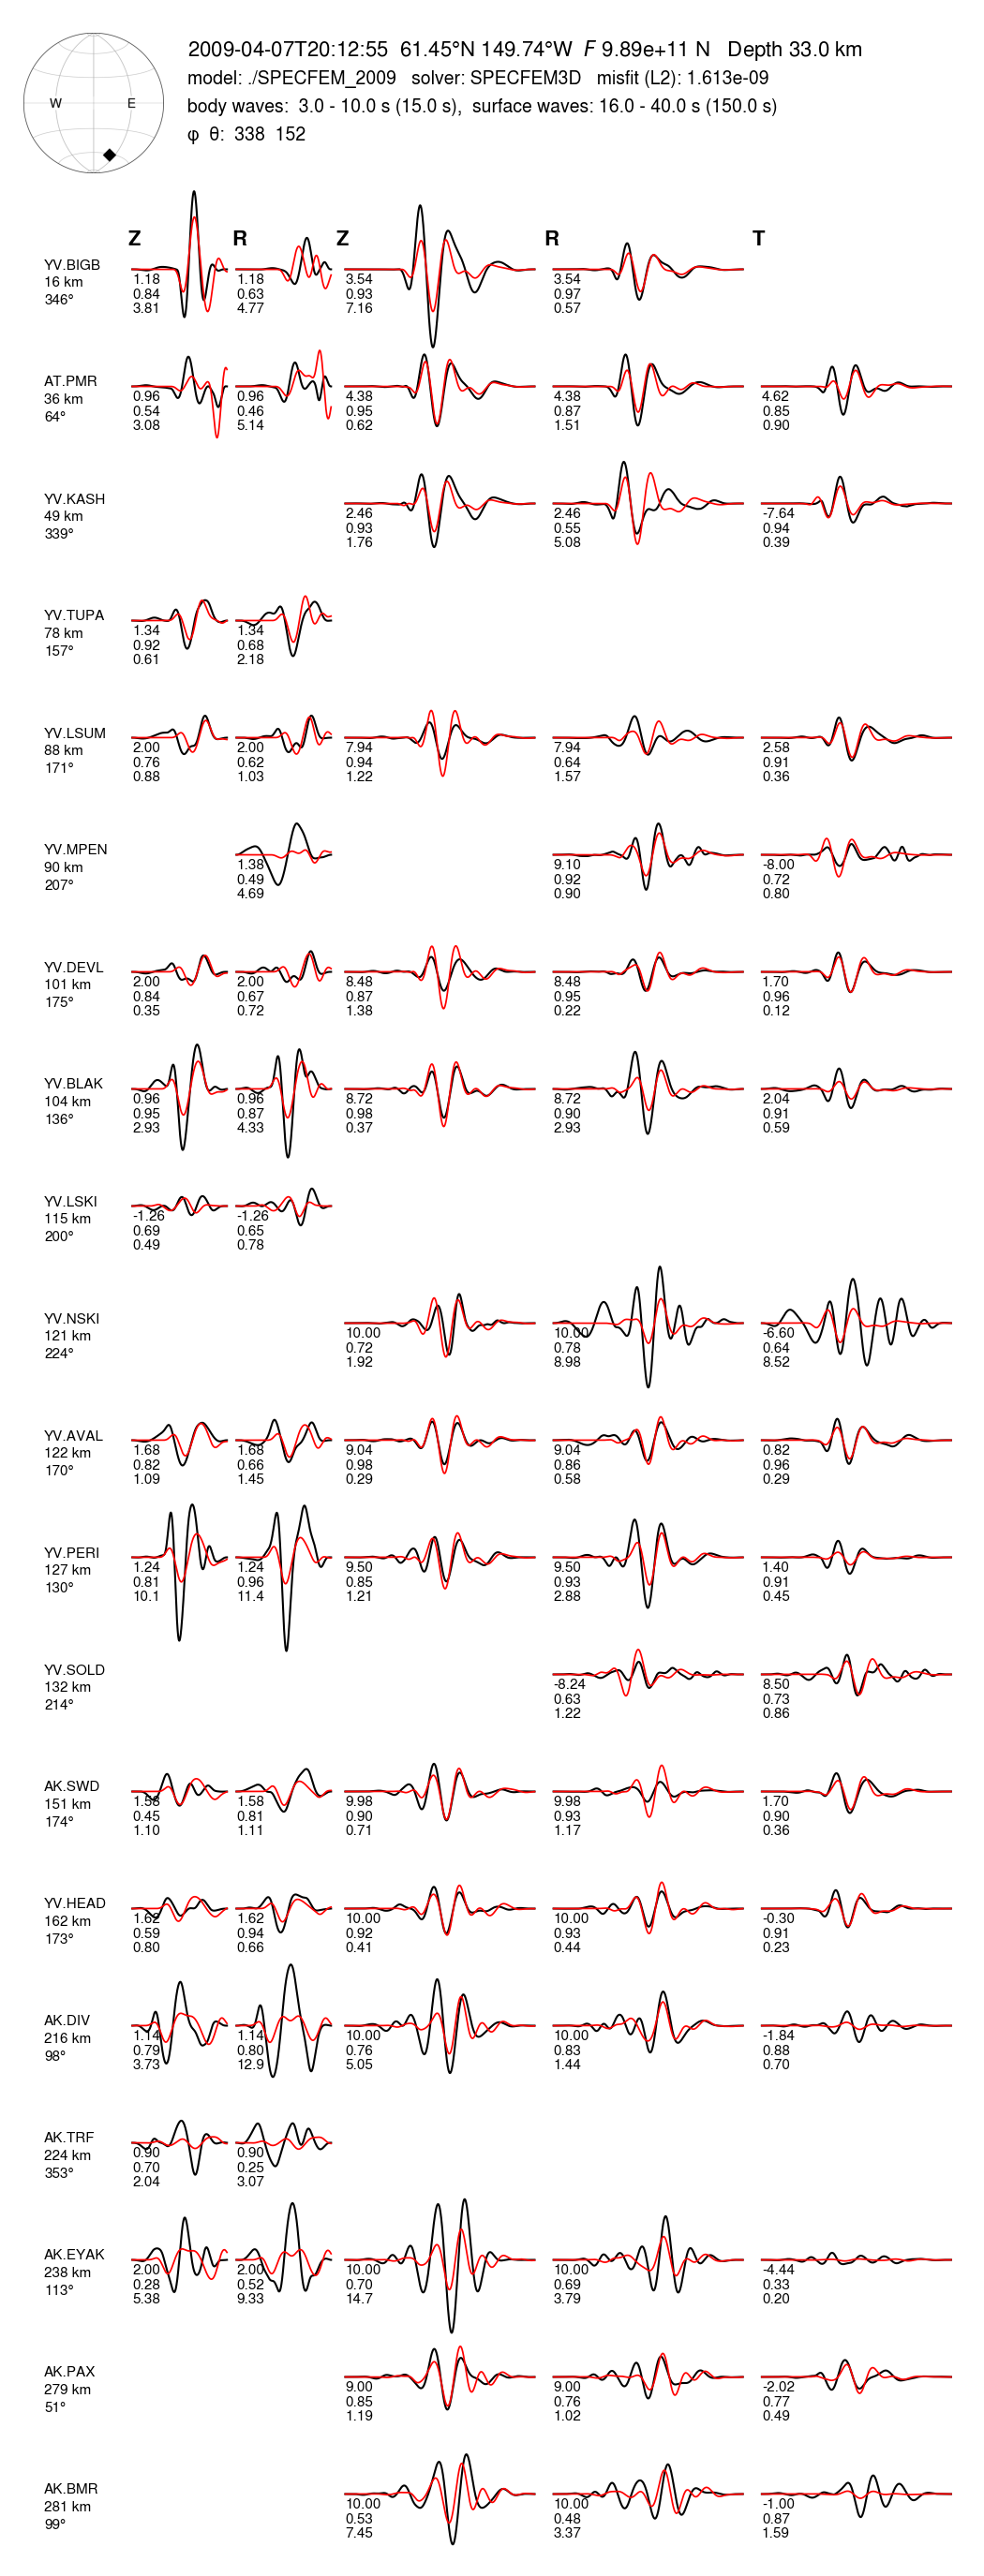

You can also compare this figure to the [results for the same event](https://uafgeotools.github.io/mtuq/user_guide/05/gallery_force.html), using Green's Functions downloaded from syngine. The differences between the two can likely be explained by the velocity model differences and/or the methods used to make the Green's Functions.

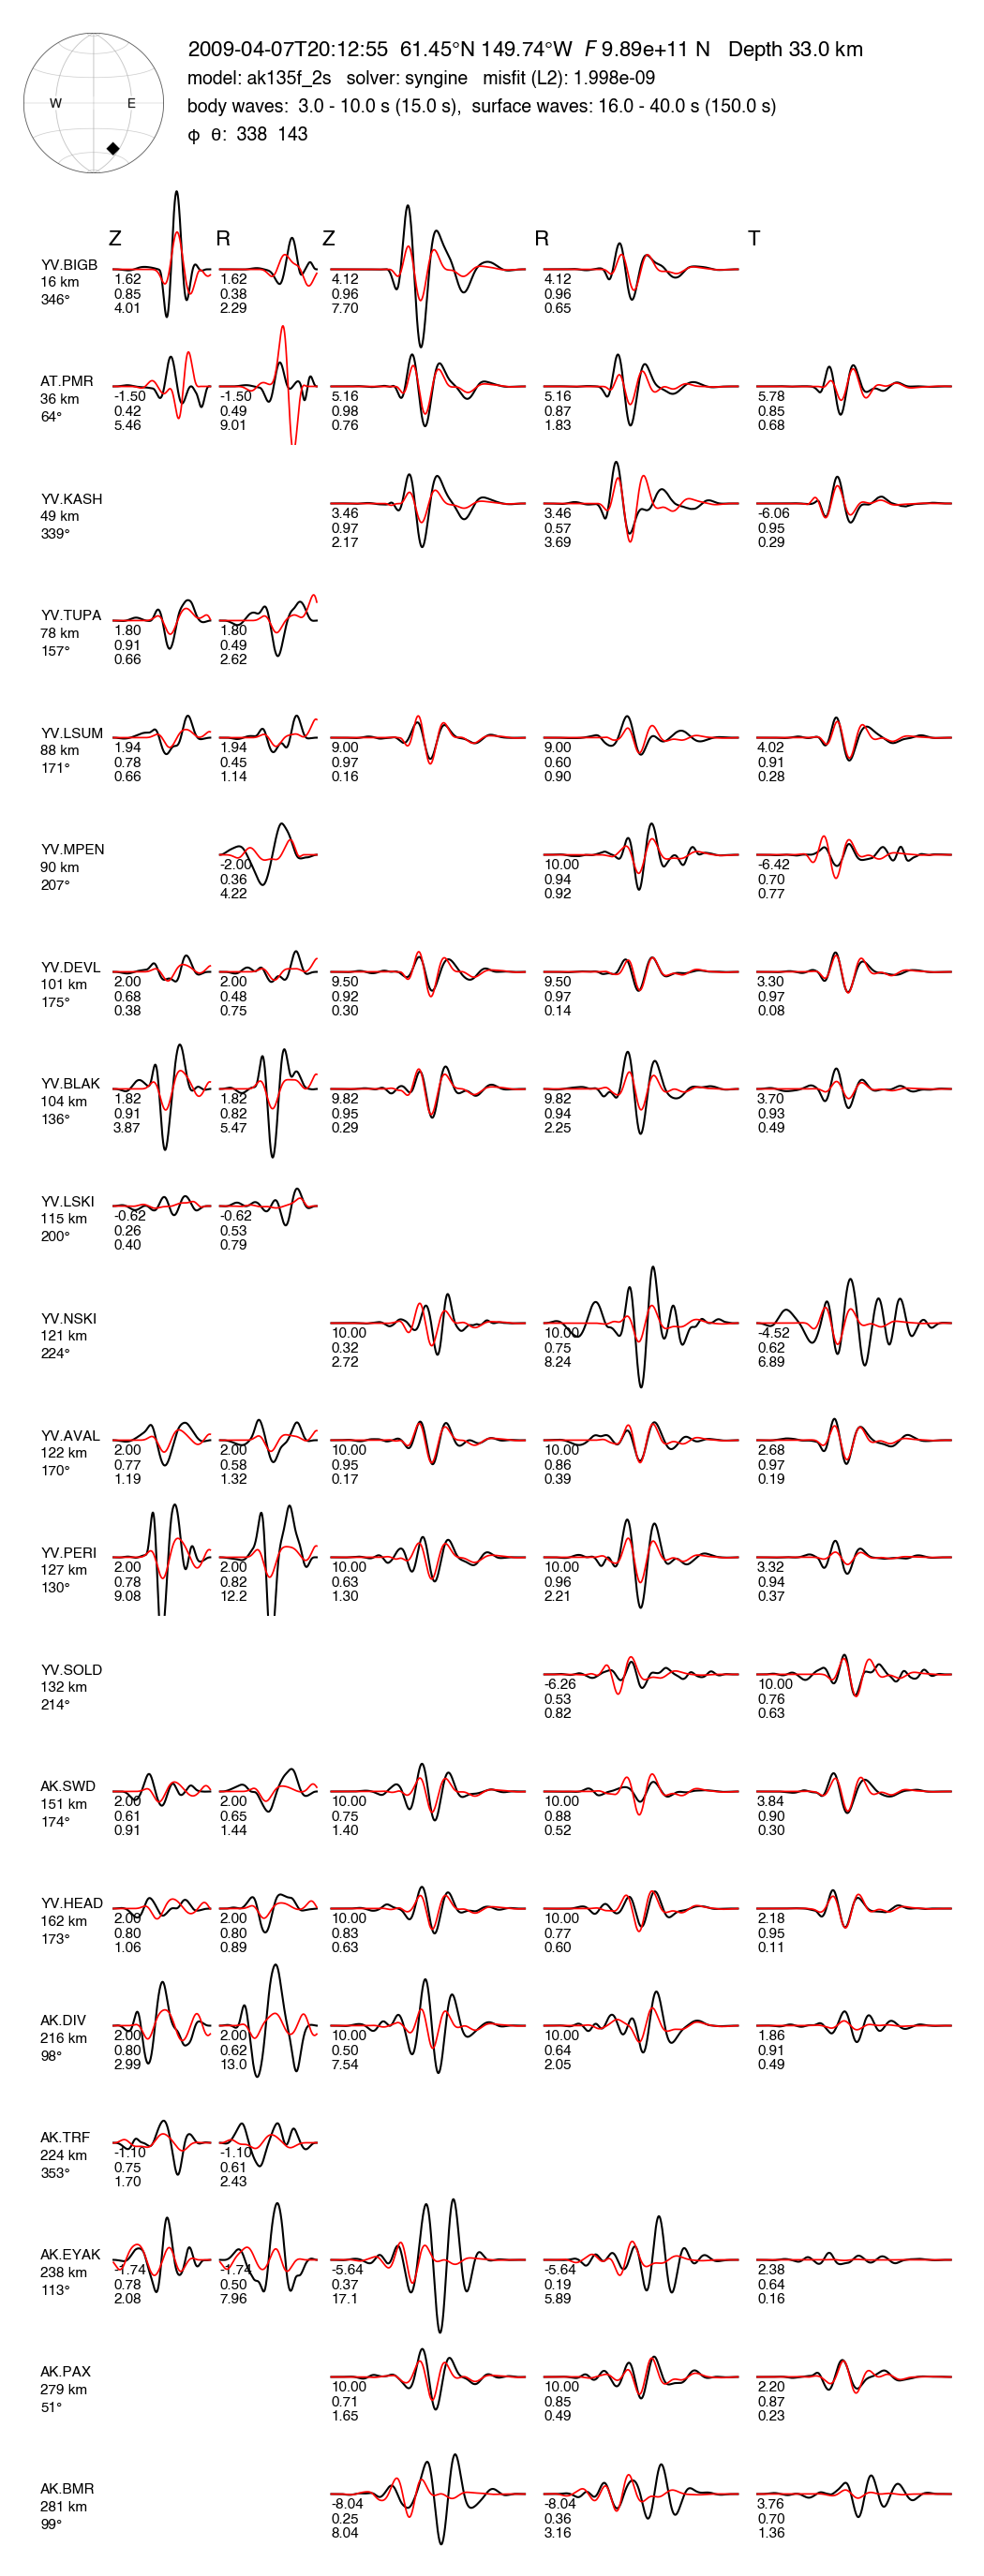

# Landslide Example

-------------------------

The second 3D Green's Functions example we provide ties into [an example force inversion](https://github.com/uafgeotools/mtuq/blob/master/examples/GridSearch.Force.py) for a 2021 landslide in southern Alaska. The FORCESOLUTION and STATIONS files are given with the suffix '_2021'. You will have to modify L194-197 of process_F_GFs.py reflect the new suffix. Otherwise, the procedure is the same! These GFs are stored in PROCESSED_2021.

Run the cell below to preprocess the Green's Functions:

In [ ]:
%run process_F_GFs.py

## Using the 3D GFs

-------------------------

Outside of this notebook, you can run ForceGridSearch_2021.py. The only significant difference between this script and the one you run for the earthquake is that this is a surface wave only inversion. Otherwise the scripts are nearly identical.

Here is the waveform comparison plot for the 3D GF inversion:
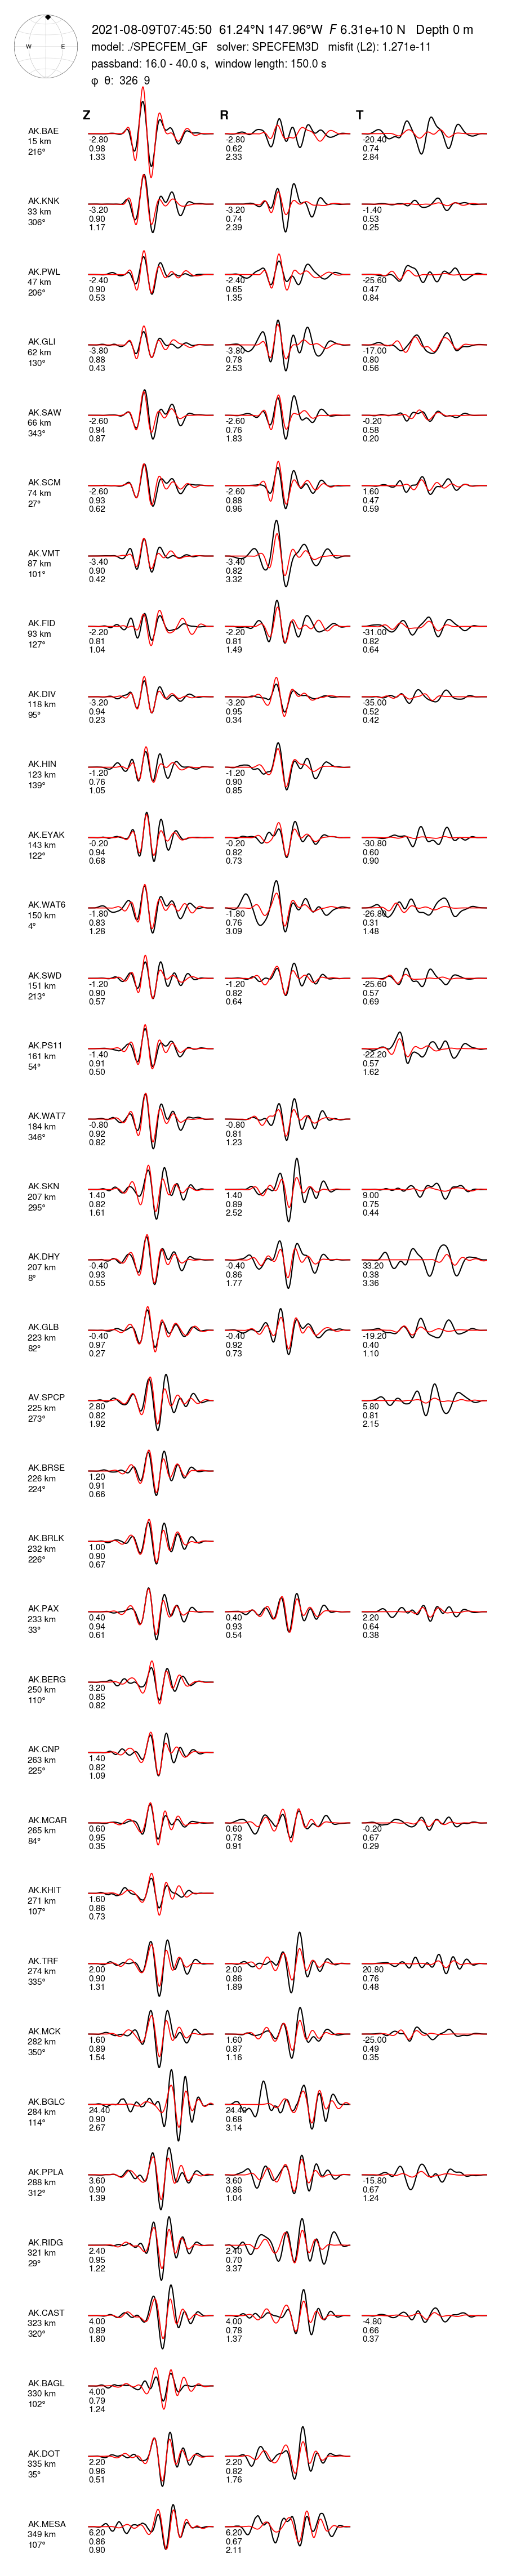

The results from the same event using GFs from AxiSEM are shown below. We can again attribute the differences between the two results to the velocity model used to make GFs or the method used to make the GFs. There are some things that you might like to change in the inversion process to fine-tune the result, including which windows to use for each station, the allowable time shift, or magnitudes to search over in the inversion. 

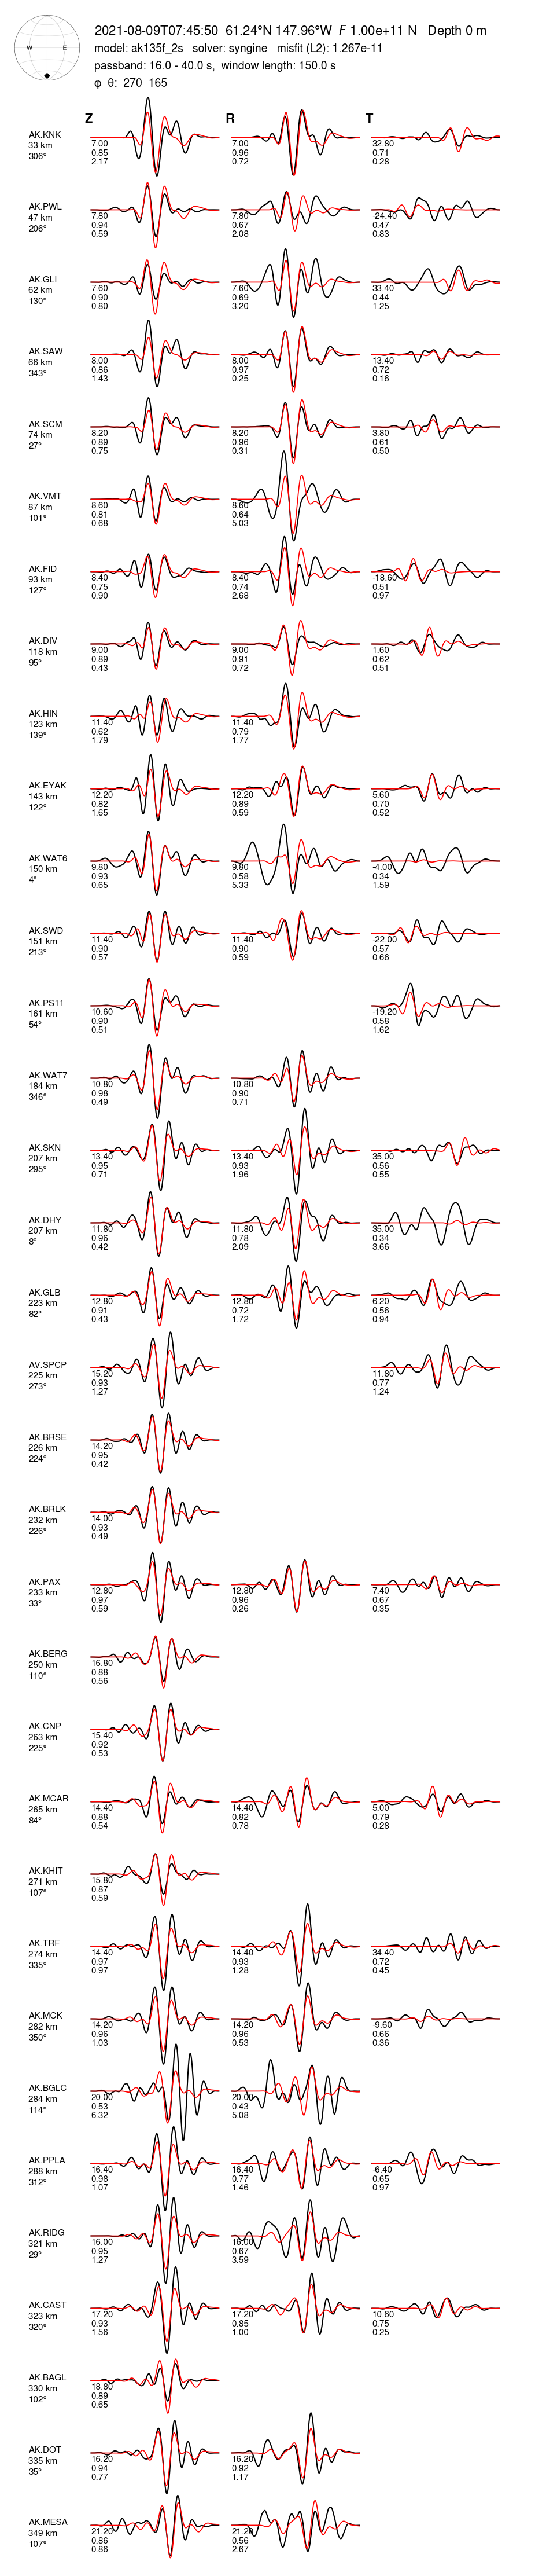